In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/titanic_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# checking the missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((data['Age'].isnull().sum()/data.shape[0])*100))

Percent of missing "Age" records is 19.87%


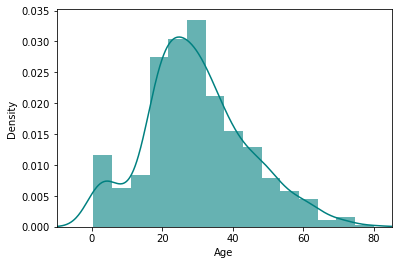

In [7]:
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

### Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the mean or median to impute the missing values.

In [8]:
data['Age'].fillna(data['Age'].mean(), inplace = True)
data['Age'].fillna(data['Age'].median(), inplace = True)

In [9]:
data.Age.mean(), data.Age.median()

(29.69911764705882, 29.69911764705882)

In [10]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((data['Cabin'].isnull().sum()/data.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


### 77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

In [11]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((data['Embarked'].isnull().sum()/data.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


### There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


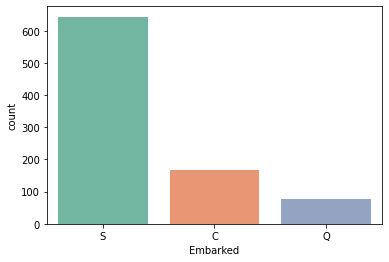

In [13]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(data['Embarked'].value_counts())
sns.countplot(x='Embarked', data=data, palette='Set2')
plt.show()

In [14]:
print('The most common boarding port of embarkation is %s.' %data['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


## Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

- If "Age" is missing for a given row, I'll impute with 28 (median age).
- If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port).
- I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with the passenger's class and fare paid.

In [18]:
data["Age"].fillna(data["Age"].median(skipna=True), inplace=True)
data["Embarked"].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)
data.drop('Cabin', axis=1, inplace=True)

In [19]:
# check missing values in adjusted train data
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
# Transform categorical column into numeric
data.replace({'Gender':{'male':0, 'female':1},
              'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace = True)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [23]:
# feature selection
X = data.drop(columns = ['PassengerId', 'Name',
                         'Ticket', 'Survived'], axis = 1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


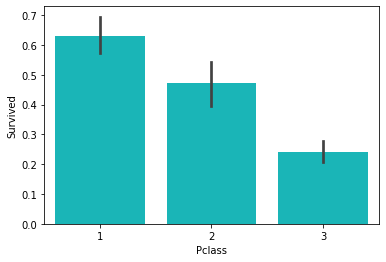

In [24]:
sns.barplot('Pclass', 'Survived', data=data, color="darkturquoise")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


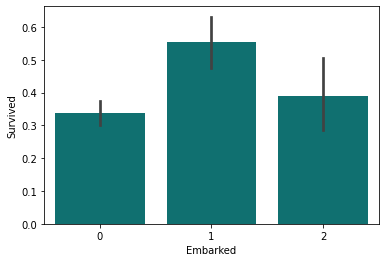

In [25]:
sns.barplot('Embarked', 'Survived', data=data, color="teal")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


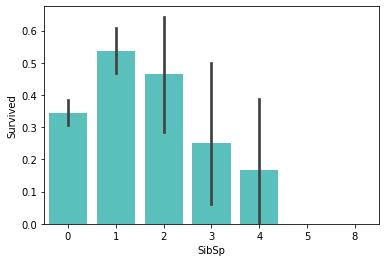

In [26]:
sns.barplot('SibSp', 'Survived', data=data, color="mediumturquoise")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


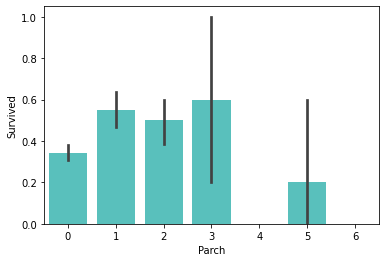

In [27]:
sns.barplot('Parch', 'Survived', data=data, color="mediumturquoise")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


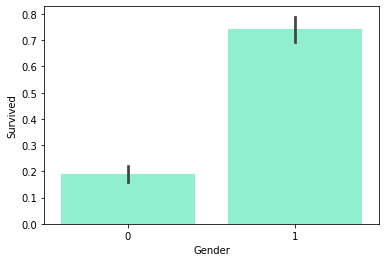

In [28]:
sns.barplot('Gender', 'Survived', data=data, color="aquamarine")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


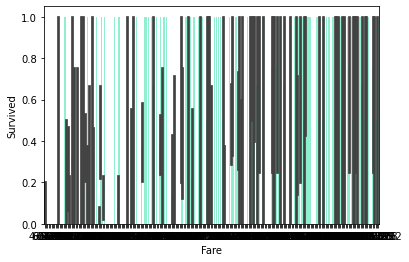

In [29]:
sns.barplot('Fare', 'Survived', data=data, color="aquamarine")
plt.show()

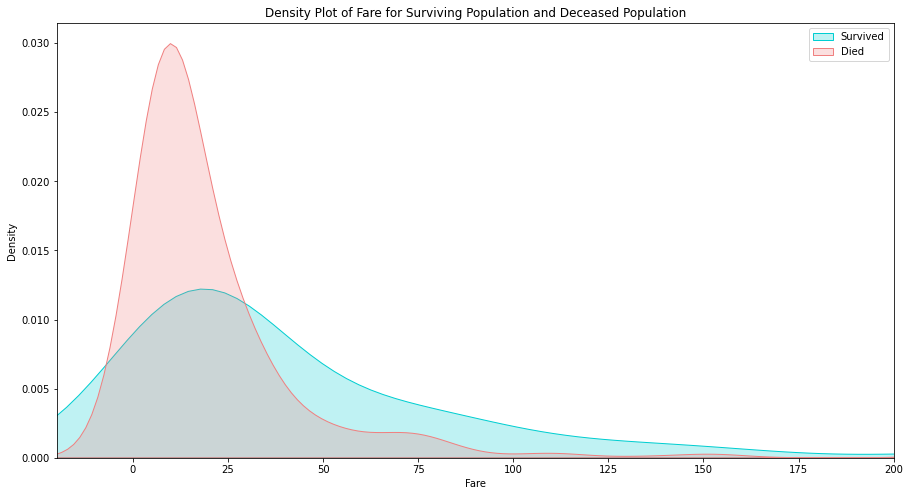

In [30]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["Fare"][data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["Fare"][data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

In [31]:
# Target Selection
y = data['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
test_data_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', test_data_accuracy)

Accuracy Score: 0.7821229050279329


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [35]:
cn_matrix = confusion_matrix(y_test, y_pred, labels = [0,1])
cn_matrix

array([[91,  9],
       [30, 49]])

## Applying this model on new data

In [36]:
X.columns

Index(['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [40]:
new_data = [3,0,35,0,0,8.05,0]
new_data = np.asarray(new_data)
new_data = new_data.reshape(1,-1)

In [41]:
pred = logreg.predict(new_data)
if pred[0] == 0:
  print('Dead')
if pred[0] == 1:
  print('Alive')

Dead


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
